In [31]:
#!pip install git+https://github.com/semoglou/composite_silhouette.git
from composite_silhouette import CompSil
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

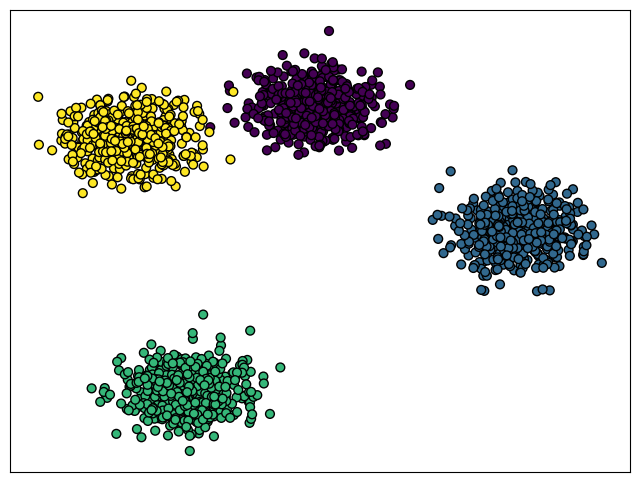

In [27]:
X, y_true = make_blobs(n_samples=2000, centers=4, cluster_std=1.1, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=40, edgecolor='k')
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
compsilhouette = CompSil(data=X,
                         ground_truth=len(set(y_true)),
                         k_values=range(2,11),
                         num_samples=500,
                         sample_size=100,
                         random_state=42,
                         n_jobs=-1)
compsilhouette.evaluate()

results_df = compsilhouette.get_results_dataframe()
display(results_df)

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,3.049652e-60,+,-0.060954,0.554036,0.614990,0.234761,0.765239,0.600681
3,1.264719e-83,+,-0.038364,0.736581,0.774945,0.240409,0.759591,0.765722
4,5.829094e-01,-,0.000791,0.766648,0.765857,0.500000,0.500000,0.766252
5,1.781149e-83,+,0.054783,0.659014,0.604231,0.763696,0.236304,0.646069
6,1.400745e-83,+,0.062440,0.568269,0.505828,0.765610,0.234390,0.553633
7,4.755194e-80,+,0.050489,0.495115,0.444625,0.762622,0.237378,0.483129
8,6.279375e-58,+,0.034239,0.446707,0.412468,0.758560,0.241440,0.438440
9,2.236018e-25,+,0.020437,0.411629,0.391192,0.755109,0.244891,0.406624
10,3.422645e-08,+,0.010354,0.391205,0.380851,0.752589,0.247411,0.388643


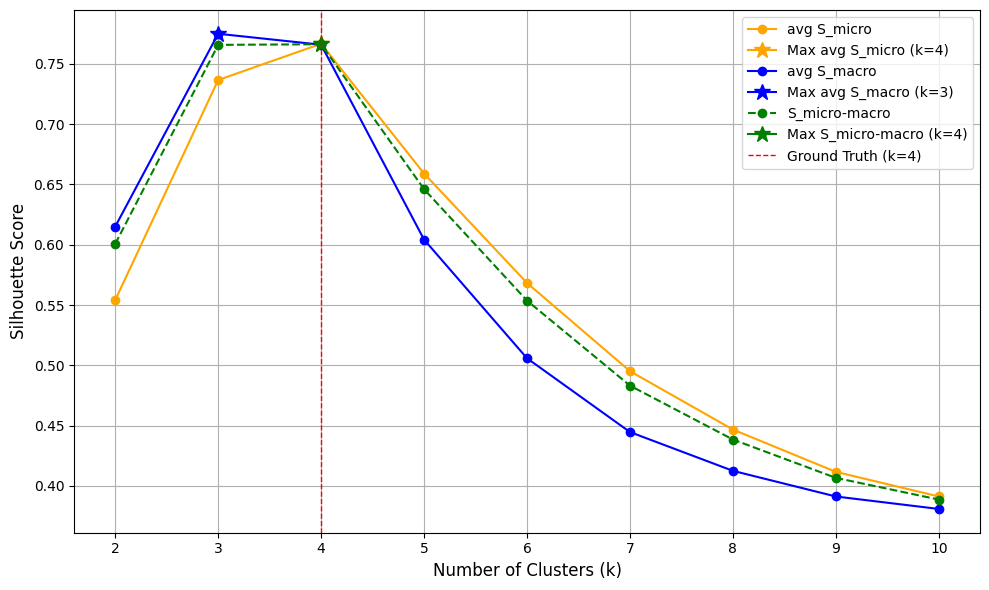

In [29]:
compsilhouette.plot_results()

In [30]:
optimal_k = compsilhouette.get_optimal_k()
print(f"Optimal k based on composite silhouette (S_micro-macro): {optimal_k}")

Optimal k based on composite silhouette (S_micro-macro): 4


In [34]:
compsilhouette = CompSil(data=X,
                         ground_truth=len(set(y_true)),
                         k_values=4,
                         num_samples=500,
                         sample_size=100,
                         random_state=42,
                         n_jobs=-1)
compsilhouette.evaluate()

score = compsilhouette.score_
print(f"Composite Silhouette Score: {score}")

Composite Silhouette Score: 0.7662523216639059
